In [1]:
from __future__ import division
import pandas as pd 
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
param_df = pd.read_csv('../data/params_df.csv')

print param_df.info()

param_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 42 columns):
atts_Man Utd           2000 non-null float64
atts_Arsenal           2000 non-null float64
atts_Chelsea           2000 non-null float64
atts_Everton           2000 non-null float64
atts_Newcastle         2000 non-null float64
atts_Southampton       2000 non-null float64
atts_Stoke             2000 non-null float64
atts_Swansea           2000 non-null float64
atts_Watford           2000 non-null float64
atts_West Brom         2000 non-null float64
atts_Liverpool         2000 non-null float64
atts_Norwich           2000 non-null float64
atts_Sunderland        2000 non-null float64
atts_West Ham          2000 non-null float64
atts_Man City          2000 non-null float64
atts_Spurs             2000 non-null float64
atts_Leicester         2000 non-null float64
atts_Aston Villa       2000 non-null float64
atts_Bournemouth       2000 non-null float64
atts_Crystal Palace    2000 non-null f

,atts_Man Utd,atts_Arsenal,atts_Chelsea,atts_Everton,atts_Newcastle,atts_Southampton,atts_Stoke,atts_Swansea,atts_Watford,atts_West Brom,...,defs_Sunderland,defs_West Ham,defs_Man City,defs_Spurs,defs_Leicester,defs_Aston Villa,defs_Bournemouth,defs_Crystal Palace,home,intercept
0,-0.158676,0.269434,0.058218,0.173135,-0.137443,0.150761,-0.086937,-0.259878,-0.080363,-0.286274,...,0.024581,0.035655,0.031297,-0.055066,-0.197241,0.143892,0.029758,-0.113533,0.190138,0.103683
1,-0.158676,0.269434,0.058218,0.173135,-0.137443,0.150761,-0.086937,-0.259878,-0.080363,-0.286274,...,0.024581,0.035655,0.031297,-0.055066,-0.197241,0.143892,0.029758,-0.113533,0.190138,0.103683
2,-0.158676,0.269434,0.058218,0.173135,-0.137443,0.150761,-0.086937,-0.259878,-0.080363,-0.286274,...,0.024581,0.035655,0.031297,-0.055066,-0.197241,0.143892,0.029758,-0.113533,0.190138,0.103683
3,-0.071908,0.456854,0.062659,0.212216,-0.055500,0.021623,-0.361882,-0.407281,-0.010712,-0.351957,...,0.218998,0.023151,-0.085500,-0.154935,-0.060878,0.257668,0.251663,0.078292,0.245914,0.156068
4,-0.012445,0.209838,0.165402,0.010923,-0.156361,0.178642,-0.069133,0.071248,-0.080647,-0.311551,...,0.120647,0.000065,-0.231232,-0.122419,-0.283261,0.240516,0.152149,-0.125116,0.174655,0.130823


## Useful Functions

In [3]:
def tau(xx, yy, lambda_param, mu, rho):
    if xx == 0 & yy == 0:
        return 1 - (lambda_param*mu*rho)
    elif xx == 0 & yy== 1:
        return 1 + (lambda_param * rho)
    elif xx == 1 & yy == 0:
        return 1 + (1 + (mu * rho))
    elif xx == 1 & yy == 1:
        return 1 - rho
    else:
        return 1
    
def calculate_mu(home_team_name, away_team_name, param_df, row_num):
    '''
    This function calculates the mu value for the given combination of home team and away team, 
    given the param_df
    '''
    home_atts = param_df['atts_{0}'.format(home_team_name)].iloc[row_num]
    home_defs = param_df['defs_{0}'.format(home_team_name)].iloc[row_num]
    away_atts = param_df['atts_{0}'.format(away_team_name)].iloc[row_num]
    away_defs = param_df['defs_{0}'.format(away_team_name)].iloc[row_num]
    intercept = param_df['intercept'].iloc[row_num]
    home = param_df['home'].iloc[row_num]
    mu = np.exp(home_atts + away_defs + home + intercept)
    return mu

def calculate_lambda_val(home_team_name, away_team_name, param_df, row_num):
    '''
    This function calculates the lambda value for the given combination of home team and away team, 
    given the param_df
    '''
    home_atts = param_df['atts_{0}'.format(home_team_name)].iloc[row_num]
    home_defs = param_df['defs_{0}'.format(home_team_name)].iloc[row_num]
    away_atts = param_df['atts_{0}'.format(away_team_name)].iloc[row_num]
    away_defs = param_df['defs_{0}'.format(away_team_name)].iloc[row_num]
    intercept = param_df['intercept'].iloc[row_num]
    lambda_val = np.exp(away_atts + home_defs + intercept)
    return lambda_val

In [4]:
tau(0, 0, 
    lambda_param=calculate_lambda_val('Arsenal', 'Man Utd', param_df, row_num=5),
    mu=calculate_mu('Arsenal', 'Man Utd', param_df, row_num=5), 
    rho=param_df['intercept'].iloc[5])

0.66877571772599675

In [5]:
def calculate_mu(home_team_name, away_team_name, param_df, row_num):
    '''
    This function calculates the mu value for the given combination of home team and away team,
    given the param_df
    '''
    home_atts = param_df['atts_{0}'.format(home_team_name)].iloc[row_num]
    home_defs = param_df['defs_{0}'.format(home_team_name)].iloc[row_num]
    away_atts = param_df['atts_{0}'.format(away_team_name)].iloc[row_num]
    away_defs = param_df['defs_{0}'.format(away_team_name)].iloc[row_num]
    intercept = param_df['intercept'].iloc[row_num]
    home = param_df['home'].iloc[row_num]
    mu = np.exp(home_atts + away_defs + home + intercept)
    return mu

def calculate_lambda_val(home_team_name, away_team_name, param_df, row_num):
    '''
    This function calculates the lambda value for the given combination of home team and away team,
    given the param_df
    '''
    home_atts = param_df['atts_{0}'.format(home_team_name)].iloc[row_num]
    home_defs = param_df['defs_{0}'.format(home_team_name)].iloc[row_num]
    away_atts = param_df['atts_{0}'.format(away_team_name)].iloc[row_num]
    away_defs = param_df['defs_{0}'.format(away_team_name)].iloc[row_num]
    intercept = param_df['intercept'].iloc[row_num]
    lambda_val = np.exp(away_atts + home_defs + intercept)
    return lambda_val

def create_scaling_matrix(mu, lambda_val, rho):
    '''
    '''
    results = []
    for xx, yy in zip([0, 1, 0, 1], [0, 0, 1, 1]):
        results.append(tau(xx, yy, lambda_param=lambda_val, mu=mu, rho=rho))

    result_array = np.array(results)
    result_matrix = result_array.reshape(2, 2)
    result_matrix = result_matrix.transpose()
    return result_matrix


def create_likelihood_matrix(mu, lambda_val, max_goals=6):
    home_dist = poisson(mu).pmf([x for x in xrange(max_goals)])
    away_dist = poisson(lambda_val).pmf([x for x in xrange(max_goals)])
    #
    x_shape = home_dist.shape[0]
    home_dist.shape = (x_shape, 1)
    y_shape = away_dist.shape[0]
    away_dist.shape = (y_shape, 1)
    result_matrix = np.matmul(home_dist, away_dist.transpose())

    return result_matrix

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import poisson

def tau(xx, yy, lambda_param, mu, rho):
    if xx == 0 & yy == 0:
        return 1 - (lambda_param*mu*rho)
    elif xx == 0 & yy== 1:
        return 1 + (lambda_param * rho)
    elif xx == 1 & yy == 0:
        return 1 + (1 + (mu * rho))
    elif xx == 1 & yy == 1:
        return 1 - rho
    else:
        return 1

def calculate_mu(home_team_name, away_team_name, param_df, row_num):
    '''
    This function calculates the mu value for the given combination of home team and away team,
    given the param_df
    '''
    home_atts = param_df['atts_{0}'.format(home_team_name)].iloc[row_num]
    home_defs = param_df['defs_{0}'.format(home_team_name)].iloc[row_num]
    away_atts = param_df['atts_{0}'.format(away_team_name)].iloc[row_num]
    away_defs = param_df['defs_{0}'.format(away_team_name)].iloc[row_num]
    intercept = param_df['intercept'].iloc[row_num]
    home = param_df['home'].iloc[row_num]
    mu = np.exp(home_atts + away_defs + home + intercept)
    return mu

def calculate_lambda_val(home_team_name, away_team_name, param_df, row_num):
    '''
    This function calculates the lambda value for the given combination of home team and away team,
    given the param_df
    '''
    home_atts = param_df['atts_{0}'.format(home_team_name)].iloc[row_num]
    home_defs = param_df['defs_{0}'.format(home_team_name)].iloc[row_num]
    away_atts = param_df['atts_{0}'.format(away_team_name)].iloc[row_num]
    away_defs = param_df['defs_{0}'.format(away_team_name)].iloc[row_num]
    intercept = param_df['intercept'].iloc[row_num]
    lambda_val = np.exp(away_atts + home_defs + intercept)
    return lambda_val

def create_scaling_matrix(mu, lambda_val, rho):
    '''
    '''
    results = []
    for xx, yy in zip([0, 1, 0, 1], [0, 0, 1, 1]):
        results.append(tau(xx, yy, lambda_param=lambda_val, mu=mu))

    result_array = np.array(results)
    result_matrix = result_array.reshape(2, 2)
    result_matrix = result_matrix.transpose()
    return result_matrix


def create_likelihood_matrix(mu, lambda_val, max_goals=6):
    '''
    '''
    home_dist = poisson(mu).pmf([x for x in xrange(max_goals)])
    away_dist = poisson(lambda_val).pmf([x for x in xrange(max_goals)])
    #
    # need to clearl define the shapes for home_dist and away_dist
    result_matrix = np.matmul(home_dist, away_dist.transpose())

    return result_matrix

def get_fixture_result(result_matrix, scaling_matrix):
    '''
    This function takes the result matric and the scaling matrix for a given
    fixture and returns a dictionary with the home / draw / away probabilities.
    '''
    result_matrix[0:2, 0:2] = np.dot(result_matrix[0:2, 0:2], scaling_matrix.transpose())
    home_abs = np.sum(np.tril(result_matrix))
    draw_abs = np.sum(np.diag(result_matrix))
    away_abs = np.sum(np.triu(result_matrix))

    # transform to probabilities
    total_absolute = home_abs + draw_abs + away_abs
    home_prob = ((home_abs / total_absolute) * 100)
    draw_prob = ((draw_abs / total_absolute) * 100)
    away_prob = ((away_abs / total_absolute) * 100)

    result_dict = {
        'home_prob': home_prob,
        'draw_prob': draw_prob,
        'away_prob': away_prob}

    return result_dict

def calculate_fixture_result(fixture_row, param_df, home_team_name,
    away_team_name):
    '''
    Using the param_df, calculate the home_prob, draw_prob, and away_prob.
    '''
    mu = calculate_mu(home_team_name, away_team_name, param_df, row_num)
    lambda_val = calculate_lambda_val(home_team_name, away_team_name,
        param_df, row_num)
    result_matrix = create_likelihood_matrix(mu, lambda_val)
    scaling_matrix = create_scaling_matrix(mu, lambda_val, rho)
    result_dict = get_fixture_result(result_matrix, scaling_matrix)
    result_dict['home_team_name'] = home_team_name
    result_dict['away_team_name'] = away_team_name

    return result_dict

def make_predictions_from_fixture_list(fixture_df, param_df, row_num):
    '''
    From a list of fixtures, and a dataframe of prediction parameters, and the
    row_num to sample from, return a dataframe with a row for each fixture.
    This must contain home team,away team, home win probability, draw
    probability, and away probability.
    '''
    home_team_list = []
    away_team_list = []
    home_prob_list = []
    draw_prob_list = []
    away_prob_list = []
    for row in fixture_df.iterrows():
        fixture_row = row[1]
        fixture_result_dict = calculate_fixture_result(fixture_row)
        home_team_list.append(fixture_result_dict['home_team_name'])
        away_team_list.append(fixture_result_dict['away_team_name'])
        home_prob_list.append(fixture_result_dict['home_prob'])
        draw_prob_list.append(fixture_result_dict['draw_prob'])
        away_prob_list.append(fixture_result_dict['away_prob'])

    data = {'home_team': home_team_list,
            'away_team': away_team_list,
            'home_prob': home_prob_list,
            'draw_prob': draw_prob_list,
            'away_prob': away_prob_list
            }
    predictions_df = pd.DataFrame(data)
    return predictions_df


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import poisson

def tau(xx, yy, lambda_param, mu, rho):
    if xx == 0 & yy == 0:
        return 1 - (lambda_param*mu*rho)
    elif xx == 0 & yy== 1:
        return 1 + (lambda_param * rho)
    elif xx == 1 & yy == 0:
        return 1 + (1 + (mu * rho))
    elif xx == 1 & yy == 1:
        return 1 - rho
    else:
        return 1

def calculate_mu(home_team_name, away_team_name, param_df, row_num):
    '''
    This function calculates the mu value for the given combination of home team and away team,
    given the param_df
    '''
    home_atts = param_df['atts_{0}'.format(home_team_name)].iloc[row_num]
    home_defs = param_df['defs_{0}'.format(home_team_name)].iloc[row_num]
    away_atts = param_df['atts_{0}'.format(away_team_name)].iloc[row_num]
    away_defs = param_df['defs_{0}'.format(away_team_name)].iloc[row_num]
    intercept = param_df['intercept'].iloc[row_num]
    home = param_df['home'].iloc[row_num]
    mu = np.exp(home_atts + away_defs + home + intercept)
    return mu

def calculate_lambda_val(home_team_name, away_team_name, param_df, row_num):
    '''
    This function calculates the lambda value for the given combination of home team and away team,
    given the param_df
    '''
    home_atts = param_df['atts_{0}'.format(home_team_name)].iloc[row_num]
    home_defs = param_df['defs_{0}'.format(home_team_name)].iloc[row_num]
    away_atts = param_df['atts_{0}'.format(away_team_name)].iloc[row_num]
    away_defs = param_df['defs_{0}'.format(away_team_name)].iloc[row_num]
    intercept = param_df['intercept'].iloc[row_num]
    lambda_val = np.exp(away_atts + home_defs + intercept)
    return lambda_val

def create_scaling_matrix(mu, lambda_val, rho):
    '''
    '''
    results = []
    for xx, yy in zip([0, 1, 0, 1], [0, 0, 1, 1]):
        results.append(tau(xx, yy, lambda_param=lambda_val, mu=mu, rho=rho))

    result_array = np.array(results)
    result_matrix = result_array.reshape(2, 2)
    result_matrix = result_matrix.transpose()
    return result_matrix


def create_likelihood_matrix(mu, lambda_val, max_goals=6):
    '''
    '''
    home_dist = poisson(mu).pmf([x for x in xrange(max_goals)])
    away_dist = poisson(lambda_val).pmf([x for x in xrange(max_goals)])
    #
    # need to clearl define the shapes for home_dist and away_dist
    home_dist.shape = (6, 1)
    away_dist.shape = (6, 1)

    result_matrix = np.matmul(home_dist, away_dist.transpose())

    return result_matrix

def get_fixture_result(result_matrix, scaling_matrix):
    '''
    This function takes the result matric and the scaling matrix for a given
    fixture and returns a dictionary with the home / draw / away probabilities.
    '''
    result_matrix[0:2, 0:2] = np.dot(result_matrix[0:2, 0:2], scaling_matrix.transpose())
    home_abs = np.sum(np.tril(result_matrix))
    draw_abs = np.sum(np.diag(result_matrix))
    away_abs = np.sum(np.triu(result_matrix))

    # transform to probabilities
    total_absolute = home_abs + draw_abs + away_abs
    home_prob = ((home_abs / total_absolute) * 100)
    draw_prob = ((draw_abs / total_absolute) * 100)
    away_prob = ((away_abs / total_absolute) * 100)

    result_dict = {
        'home_prob': home_prob,
        'draw_prob': draw_prob,
        'away_prob': away_prob}

    return result_dict

def calculate_fixture_result(fixture_row, param_df, home_team_name,
    away_team_name):
    '''
    Using the param_df, calculate the home_prob, draw_prob, and away_prob.
    '''
    mu = calculate_mu(home_team_name, away_team_name, param_df, row_num)
    lambda_val = calculate_lambda_val(home_team_name, away_team_name,
        param_df, row_num)
    result_matrix = create_likelihood_matrix(mu, lambda_val)

    scaling_matrix = create_scaling_matrix(mu, lambda_val, rho)
    result_dict = get_fixture_result(result_matrix, scaling_matrix)
    result_dict['home_team_name'] = home_team_name
    result_dict['away_team_name'] = away_team_name

    return result_dict

def make_predictions_from_fixture_list(fixture_df, param_df, row_num):
    '''
    From a list of fixtures, and a dataframe of prediction parameters, and the
    row_num to sample from, return a dataframe with a row for each fixture.
    This must contain home team,away team, home win probability, draw
    probability, and away probability.
    '''
    home_team_list = []
    away_team_list = []
    home_prob_list = []
    draw_prob_list = []
    away_prob_list = []
    for row in fixture_df.iterrows():
        fixture_row = row[1]
        home_team_name = fixture_row['home_team']
        away_team_name = fixture_row['away_team']
        fixture_result_dict = calculate_fixture_result(fixture_row, param_df,
            home_team_name, away_team_name)
        home_team_list.append(fixture_result_dict['home_team_name'])
        away_team_list.append(fixture_result_dict['away_team_name'])
        home_prob_list.append(fixture_result_dict['home_prob'])
        draw_prob_list.append(fixture_result_dict['draw_prob'])
        away_prob_list.append(fixture_result_dict['away_prob'])

    data = {'home_team': home_team_list,
            'away_team': away_team_list,
            'home_prob': home_prob_list,
            'draw_prob': draw_prob_list,
            'away_prob': away_prob_list
            }
    predictions_df = pd.DataFrame(data)
    return predictions_df

def get_actual_result(row, results_df=results_df):
    '''
    Takes a row containing 'home_team' and 'away_team', and looks up the fixture
    in the results_df to find out who won.
    '''
    
    home_team = row['home_team']
    away_team = row['away_team']
    result = results_df[(results_df['home_team'] == home_team) &
        (results_df['away_team'] == away_team)]
    assert len(result) == 1
    result = result.iloc[0]
    if result['home_score'] > result['away_score']:
        return 'H'

    if result['home_score'] == result['away_score']:
        return 'D'

    if result['home_score'] < result['away_score']:
        return 'L'


In [18]:
get_actual_result(a.iloc[1], results_df)

'H'

In [116]:
a = make_predictions_from_fixture_list(results_df, param_df, 1500)

In [66]:
a['actual_result'] = a.apply(get_actual_result, axis=1)

In [67]:
a.head()

,away_prob,away_team,draw_prob,home_prob,home_team,actual_result
0,29.672241,Bournemouth,18.369985,51.957773,Man Utd,H
1,19.957426,Aston Villa,14.457742,65.584832,Arsenal,H
2,41.862144,Leicester,19.862024,38.275832,Chelsea,D
3,34.801710,Norwich,17.454348,47.743942,Everton,H
4,46.912272,Spurs,18.574965,34.512763,Newcastle,H


In [68]:
assesment_df = pd.melt(a, id_vars=['home_team', 'away_team', 'actual_result'])
assesment_df['actual_result'] = assesment_df['actual_result'].astype('category')

In [69]:
assesment_df.head()

,home_team,away_team,actual_result,variable,value
0,Man Utd,Bournemouth,H,away_prob,29.672241
1,Arsenal,Aston Villa,H,away_prob,19.957426
2,Chelsea,Leicester,D,away_prob,41.862144
3,Everton,Norwich,H,away_prob,34.801710
4,Newcastle,Spurs,H,away_prob,46.912272


In [70]:
a = assesment_df.groupby('variable').get_group('away_prob')

In [87]:
b = a.groupby(pd.cut(a.value, 20)).get_group('(47.457, 49.445]')['actual_result']

In [85]:
pd.cut?

In [91]:
b.value_counts()

L    6
D    4
H    1
Name: actual_result, dtype: int64

In [112]:
def calculate_percentage_of_results_in_subset(group, result):
    '''
    Calculate the total rows in the group.
    Then calculate how many of them are of the specified results type.
    Then calculate what % that is.
    '''
    total_fixtures_in_group = len(group.values)
    fixtures_at_given_result = b.value_counts().loc[result]
    print('Total: {0}'.format(total_fixtures_in_group))
    print ('Subset: {0}'.format(fixtures_at_given_result))
    percentage_correct = (fixtures_at_given_result / total_fixtures_in_group) * 100
    return percentage_correct    
    

In [113]:
calculate_percentage_of_results_in_subset(b, 'L')

Total: 11
Subset: 6


54.54545454545454

In [106]:
b.value_counts().index

CategoricalIndex([u'L', u'D', u'H'], categories=[u'D', u'H', u'L'], ordered=False, dtype='category')

In [115]:
a.groupby(pd.cut(a.value, 20)).get_group('(19.583, 21.611]')

,home_team,away_team,actual_result,variable,value
1,Arsenal,Aston Villa,H,away_prob,19.957426
97,Man City,Aston Villa,H,away_prob,19.622567
270,Spurs,Aston Villa,H,away_prob,19.756300
293,Chelsea,Aston Villa,H,away_prob,20.351179
331,Leicester,Aston Villa,H,away_prob,20.096534


In [122]:
param_df.columns[0][0:4]

'atts'

In [130]:
param_df.describe().iloc[1]

atts_Man Utd          -0.033821
atts_Arsenal           0.198217
atts_Chelsea           0.125250
atts_Everton           0.130286
atts_Newcastle        -0.091007
atts_Southampton       0.120953
atts_Stoke            -0.147414
atts_Swansea          -0.130491
atts_Watford          -0.168707
atts_West Brom        -0.277905
atts_Liverpool         0.179659
atts_Norwich          -0.172197
atts_Sunderland       -0.030125
atts_West Ham          0.204967
atts_Man City          0.274716
atts_Spurs             0.250630
atts_Leicester         0.234704
atts_Aston Villa      -0.401778
atts_Bournemouth      -0.076167
atts_Crystal Palace   -0.189770
defs_Man Utd          -0.239745
defs_Arsenal          -0.215340
defs_Chelsea           0.035292
defs_Everton           0.067278
defs_Newcastle         0.182656
defs_Southampton      -0.136511
defs_Stoke             0.053216
defs_Swansea           0.014463
defs_Watford          -0.016360
defs_West Brom        -0.045421
defs_Liverpool        -0.001476
defs_Nor

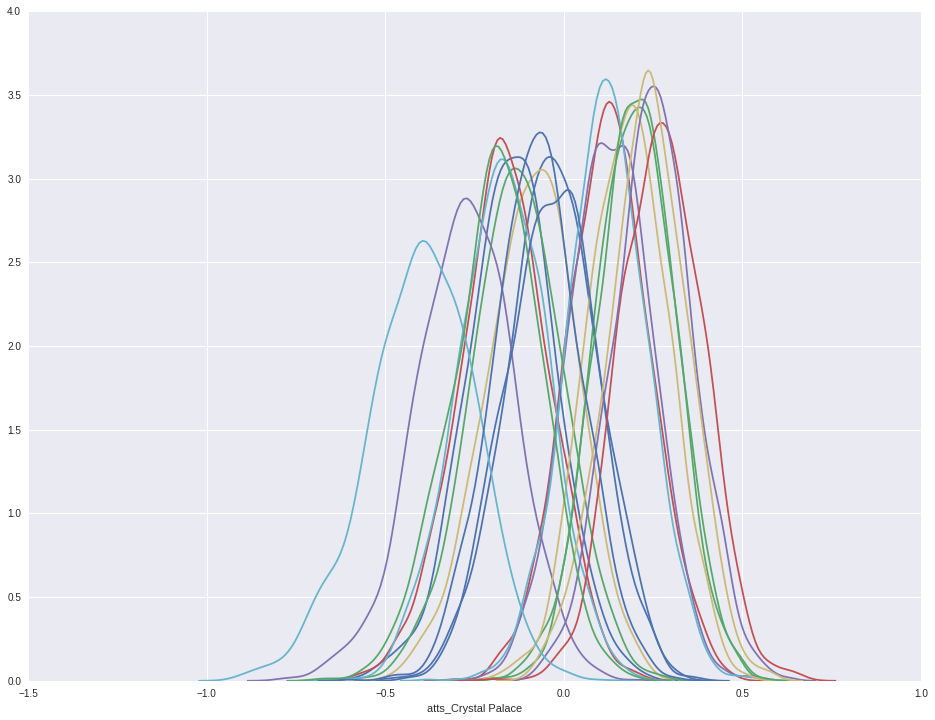

In [124]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
for col_name in param_df.columns:
    if col_name[0:4] == 'atts':
        sns.distplot(param_df[col_name], hist=False, ax=ax)

In [114]:
for name, group in a.groupby(pd.cut(a.value, 20)):
    print name
    print calculate_percentage_of_results_in_subset(group, 'L')


(19.583, 21.611]
Total: 5
Subset: 6
120.0
(21.611, 23.599]
Total: 1
Subset: 6
600.0
(23.599, 25.587]
Total: 10
Subset: 6
60.0
(25.587, 27.575]
Total: 6
Subset: 6
100.0
(27.575, 29.563]
Total: 21
Subset: 6
28.5714285714
(29.563, 31.552]
Total: 36
Subset: 6
16.6666666667
(31.552, 33.54]
Total: 29
Subset: 6
20.6896551724
(33.54, 35.528]
Total: 40
Subset: 6
15.0
(35.528, 37.516]
Total: 43
Subset: 6
13.9534883721
(37.516, 39.504]
Total: 41
Subset: 6
14.6341463415
(39.504, 41.493]
Total: 41
Subset: 6
14.6341463415
(41.493, 43.481]
Total: 26
Subset: 6
23.0769230769
(43.481, 45.469]
Total: 27
Subset: 6
22.2222222222
(45.469, 47.457]
Total: 24
Subset: 6
25.0
(47.457, 49.445]
Total: 11
Subset: 6
54.5454545455
(49.445, 51.433]
Total: 4
Subset: 6
150.0
(51.433, 53.422]
Total: 8
Subset: 6
75.0
(53.422, 55.41]
Total: 2
Subset: 6
300.0
(55.41, 57.398]
Total: 0
Subset: 6
inf
(57.398, 59.386]
Total: 5
Subset: 6
120.0


In [76]:
20 / 57

0.3508771929824561

In [75]:
b.describe()

count     57
unique     3
top        H
freq      37
Name: actual_result, dtype: object

In [ ]:
a.groupby

In [8]:
results_df = pd.read_csv('../data/15_16_results.csv', '\t')

print results_df.info()

results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 8 columns):
date          380 non-null object
time          380 non-null object
home_team     380 non-null object
score         380 non-null object
away_team     380 non-null object
location      380 non-null object
home_score    380 non-null int64
away_score    380 non-null int64
dtypes: int64(2), object(6)
memory usage: 23.8+ KB
None


,date,time,home_team,score,away_team,location,home_score,away_score
0,17/5/2016,20:00,Man Utd,3 - 1,Bournemouth,Old Trafford,3,1
1,15/5/2016,15:00,Arsenal,4 - 0,Aston Villa,Emirates Stadium,4,0
2,16/5/2016,15:00,Chelsea,1 - 1,Leicester,Stamford Bridge,1,1
3,17/5/2016,15:00,Everton,3 - 0,Norwich,Goodison Park,3,0
4,18/5/2016,15:00,Newcastle,5 - 1,Spurs,St. James' Park,5,1


In [13]:
data = {
    'home_team': ['Man City', 'Arsenal', 'Man Utd'],
    'away_team': ['Watford', 'Aston Villa', 'Newcastle']}
fixture_df = pd.DataFrame(data)

In [15]:
home_team = 'Man City'
away_team = 'Aston Villa'
row_num = 1000
rho = param_df['intercept'].iloc[row_num]
mu = calculate_mu(home_team, away_team, param_df, row_num)
lambda_val = calculate_lambda_val(home_team, away_team, param_df, row_num)
result_matrix = create_likelihood_matrix(mu, lambda_val)
scaling_matrix = create_scaling_matrix(mu, lambda_val, rho)

In [16]:
a = get_fixture_result(result_matrix, scaling_matrix)

In [218]:
overall_distribution = []
for iteration in xrange(0, 1000):
    summation = []
    for i in [x for x in np.random.rand(10)]:
        if i <= 0.4:
            summation.append(1.60)
        else:
            summation.append(-1)
    overall_distribution.append(np.sum(summation))
np.mean(overall_distribution)

0.48320000000000013

1.4635